#Задание 1

<function matplotlib.pyplot.show(close=None, block=None)>

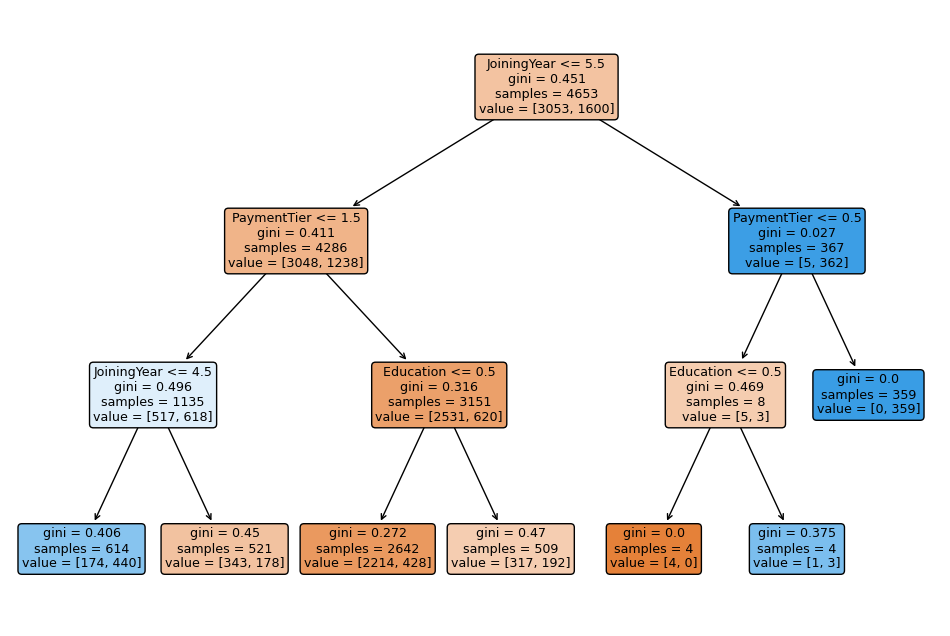

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("./drive/MyDrive/Employee.csv")

model = DecisionTreeClassifier(max_depth=3)

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

feature_names = X.columns

label_encoder = LabelEncoder()

for column in X.columns:
  X[column] = label_encoder.fit_transform(X[column])

model.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=feature_names,rounded=True)
plt.show

#Задание 2

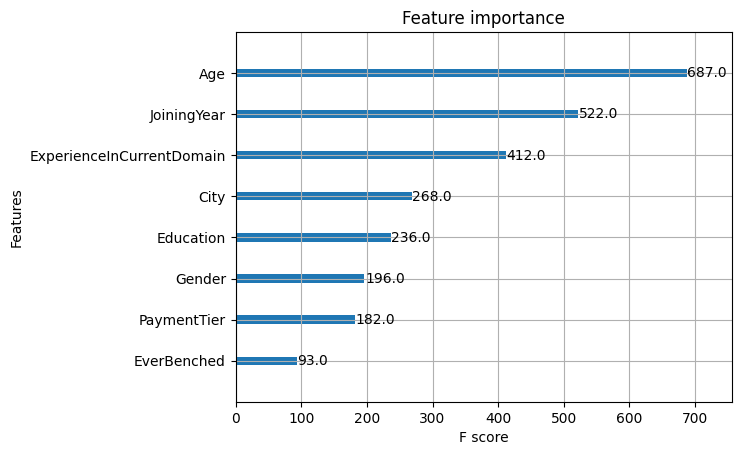

Дерево 1:
0:[JoiningYear<6] yes=1,no=2,missing=2
	1:[PaymentTier<2] yes=3,no=4,missing=4
		3:[JoiningYear<5] yes=7,no=8,missing=8
			7:[PaymentTier<1] yes=11,no=12,missing=12
				11:[City<1] yes=19,no=20,missing=20
					19:[Education<1] yes=35,no=36,missing=36
						35:leaf=-0.229631618
						36:leaf=0.0579670928
					20:[Gender<1] yes=37,no=38,missing=38
						37:leaf=0.486719042
						38:leaf=-0.173799545
				12:[Education<1] yes=21,no=22,missing=22
					21:[Gender<1] yes=39,no=40,missing=40
						39:leaf=0.819608212
						40:leaf=0.329194099
					22:[JoiningYear<2] yes=41,no=42,missing=42
						41:leaf=0.67736578
						42:leaf=-0.160224497
			8:[Age<6] yes=13,no=14,missing=14
				13:[Education<1] yes=23,no=24,missing=24
					23:[City<2] yes=43,no=44,missing=44
						43:leaf=-0.343951225
						44:leaf=0.390722781
					24:[EverBenched<1] yes=45,no=46,missing=46
						45:leaf=0.213689327
						46:leaf=0.629991353
				14:[Gender<1] yes=25,no=26,missing=26
					25:[Education<1] yes=47,no

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
xgb.plot_importance(model)
plt.show()

tree_list = model.get_booster().get_dump()
for i, tree in enumerate(tree_list):
    print(f"Дерево {i + 1}:\n{tree}\n")


#Задание 3

<function matplotlib.pyplot.show(close=None, block=None)>

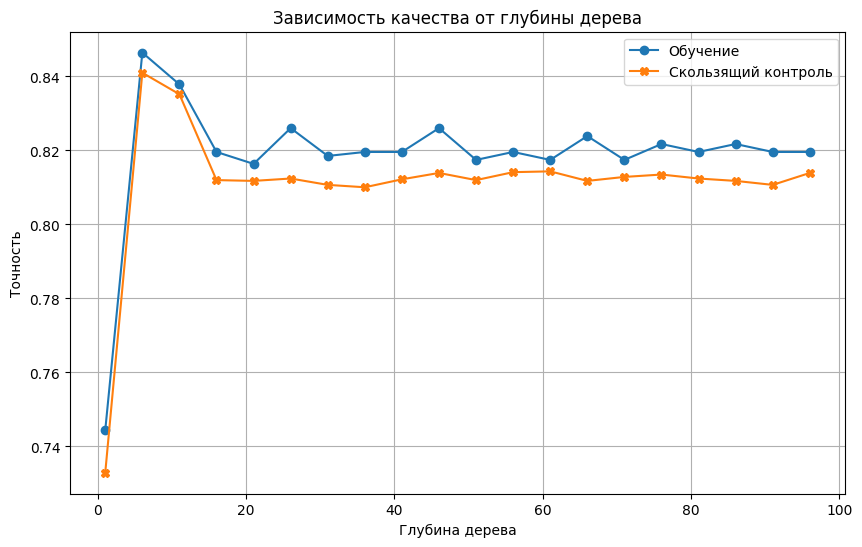

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

max_depths = np.arange(1, 101, 5)

def fit_accuracy(max_depth):
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

def cross_val_accuracy(max_depth):
  model = DecisionTreeClassifier(max_depth=max_depth)
  scores = cross_val_score(model, X, y, scoring='accuracy')
  accuracy = np.mean(scores)
  return accuracy


accuracies_fit = []
accuracies_cross_val = []
for max_depth in max_depths:
  accuracies_fit.append(fit_accuracy(max_depth))
  accuracies_cross_val.append(cross_val_accuracy(max_depth))


plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies_fit, label='Обучение', marker='o')
plt.plot(max_depths, accuracies_cross_val, label='Скользящий контроль', marker='X')
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.title('Зависимость качества от глубины дерева')
plt.legend()
plt.grid(True)
plt.show

#Задание 4

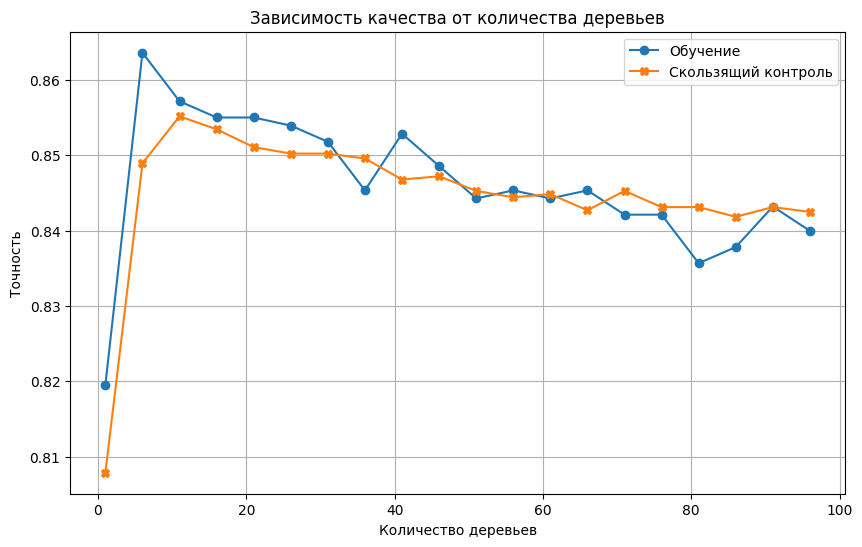

In [ ]:
n_trees = np.arange(1, 101, 5)

def fit_xgb_accuracy(n_tree):
  model = xgb.XGBClassifier(n_estimators=n_tree)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

def cross_val_xgb_accuracy(n_tree):
  model = xgb.XGBClassifier(n_estimators=n_tree)
  scores = cross_val_score(model, X, y, scoring='accuracy')
  accuracy = np.mean(scores)
  return accuracy


accuracies_xgb_fit = []
accuracies_xgb_cross_val = []

for n_tree in n_trees:
  accuracies_xgb_fit.append(fit_xgb_accuracy(n_tree))
  accuracies_xgb_cross_val.append(cross_val_xgb_accuracy(n_tree))

plt.figure(figsize=(10, 6))
plt.plot(n_trees, accuracies_xgb_fit, label ='Обучение', marker='o')
plt.plot(n_trees, accuracies_xgb_cross_val, label='Скользящий контроль', marker='X')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.title('Зависимость качества от количества деревьев')
plt.legend()
plt.grid()
plt.show()


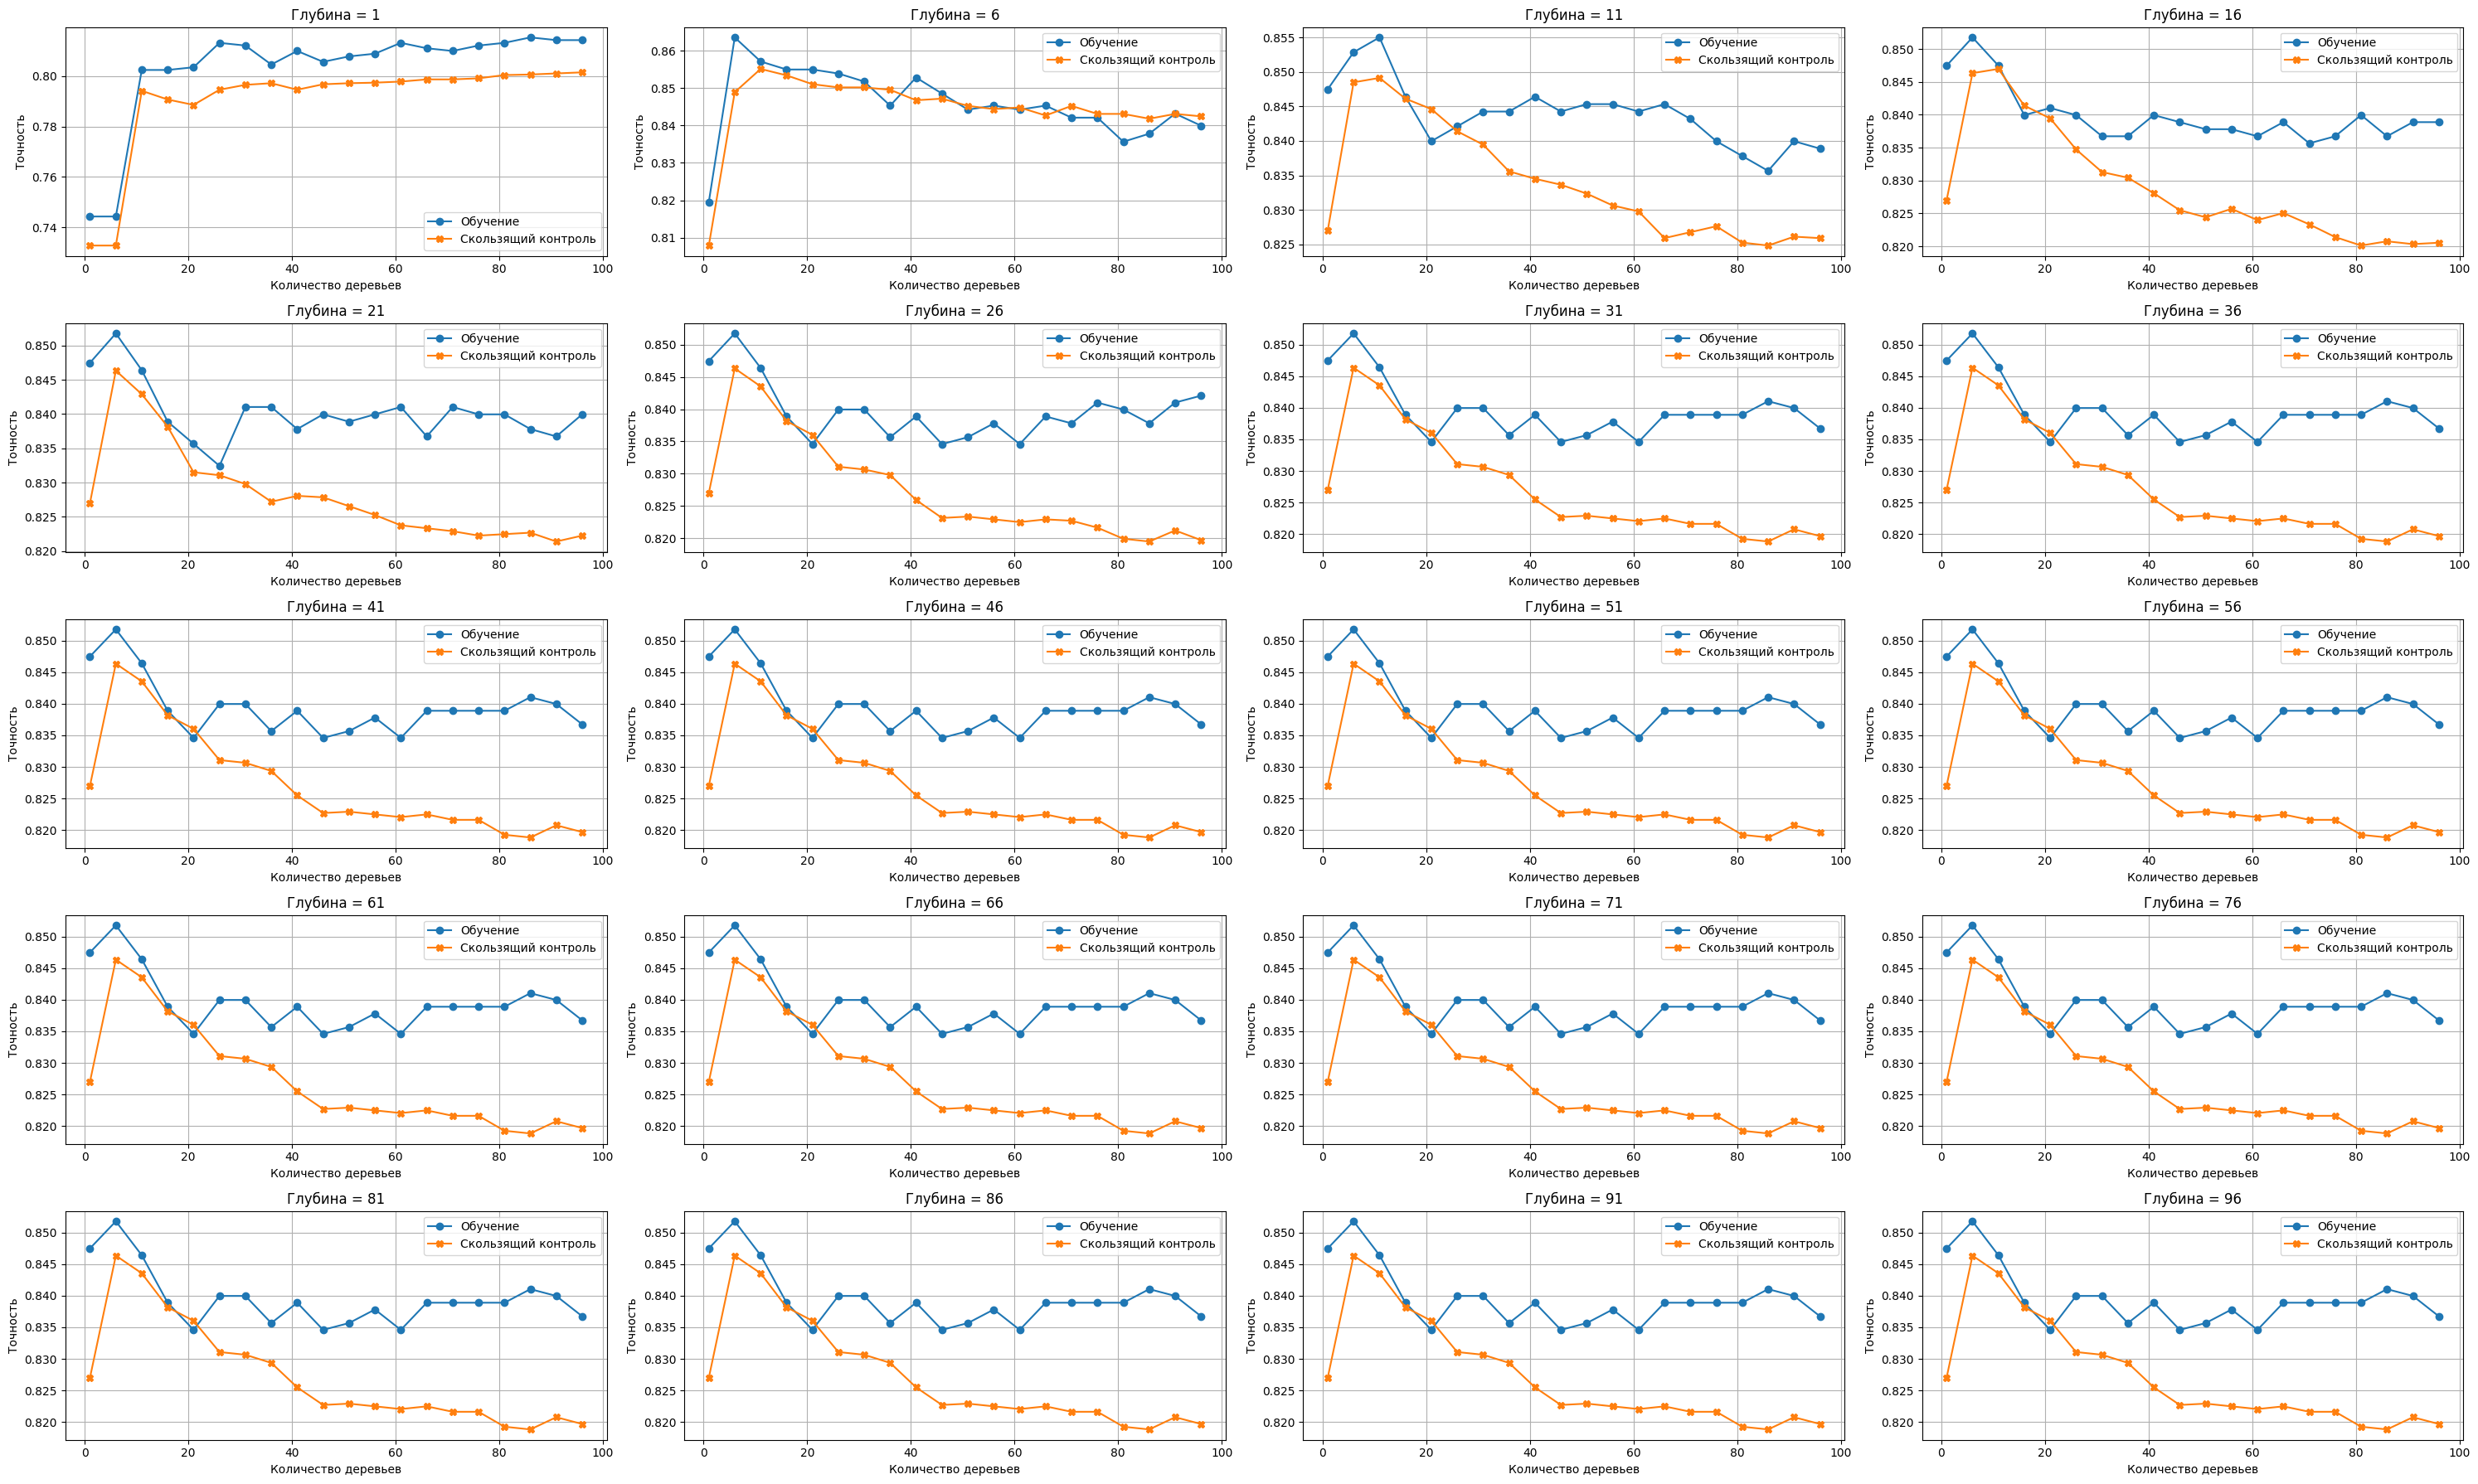

Top 5 best accuracies on fit:
1. Accuracy = 0.8635875402792696 N_trees = 6 Max_depth = 6
2. Accuracy = 0.8571428571428571 N_trees = 11 Max_depth = 6
3. Accuracy = 0.8549946294307197 N_trees = 16 Max_depth = 6
4. Accuracy = 0.8549946294307197 N_trees = 21 Max_depth = 6
5. Accuracy = 0.8549946294307197 N_trees = 11 Max_depth = 11
Top 5 best accuracies on cross_val:
1. Accuracy = 0.8551477772772946 N_trees = 11 Max_depth = 6
2. Accuracy = 0.8534275781619949 N_trees = 16 Max_depth = 6
3. Accuracy = 0.8510642966864165 N_trees = 21 Max_depth = 6
4. Accuracy = 0.8502047746093343 N_trees = 26 Max_depth = 6
5. Accuracy = 0.850204081632653 N_trees = 31 Max_depth = 6


In [ ]:
n_trees = np.arange(1, 101, 5)
max_depths = np.arange(1, 101, 5)

def fit_xgb_accuracy(n_tree, max_depth):
  model = xgb.XGBClassifier(n_estimators=n_tree, max_depth=max_depth)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

def cross_val_xgb_accuracy(n_tree, max_depth):
  model = xgb.XGBClassifier(n_estimators=n_tree, max_depth=max_depth)
  scores = cross_val_score(model, X, y, scoring='accuracy')
  accuracy = np.mean(scores)
  return accuracy

fig, axs = plt.subplots(5, 4, figsize=(30, 18))

triple_fit = []
triple_cross_val = []
for max_depth, ax in zip(max_depths, axs.flatten()):
  accuracies_xgb_fit = []
  accuracies_xgb_cross_val = []
  for n_tree in n_trees:
    accuracy_fit = fit_xgb_accuracy(n_tree, max_depth)
    accuracy_cross_val = cross_val_xgb_accuracy(n_tree, max_depth)
    accuracies_xgb_fit.append(accuracy_fit)
    accuracies_xgb_cross_val.append(accuracy_cross_val)
    triple_fit.append((accuracy_fit, n_tree, max_depth))
    triple_cross_val.append((accuracy_cross_val, n_tree, max_depth))
  ax.plot(n_trees, accuracies_xgb_fit, label ='Обучение', marker='o')
  ax.plot(n_trees, accuracies_xgb_cross_val, label='Скользящий контроль', marker='X')
  ax.set_xlabel('Количество деревьев')
  ax.set_ylabel('Точность')
  ax.set_title('Глубина = ' + str(max_depth))
  ax.legend()
  ax.grid()
plt.tight_layout()
plt.show()

sorted_triple_fit = sorted(triple_fit, key = lambda x: x[0], reverse=True)
sorted_triple_cross_val = sorted(triple_cross_val, key = lambda x: x[0], reverse=True)

print('Top 5 best accuracies on fit:')
i = 1
for triple_fit in sorted_triple_fit:
  print(str(i) + '. Accuracy = ' + str(triple_fit[0]) + ' N_trees = ' + str(triple_fit[1]) + ' Max_depth = ' + str(triple_fit[2]))
  if i == 5:
    break
  i += 1

print('Top 5 best accuracies on cross_val:')
i = 1
for triple_cross_val in sorted_triple_cross_val:
  print(str(i) + '. Accuracy = ' + str(triple_cross_val[0]) + ' N_trees = ' + str(triple_cross_val[1]) + ' Max_depth = ' + str(triple_cross_val[2]))
  if i == 5:
    break
  i += 1




#Задание 5

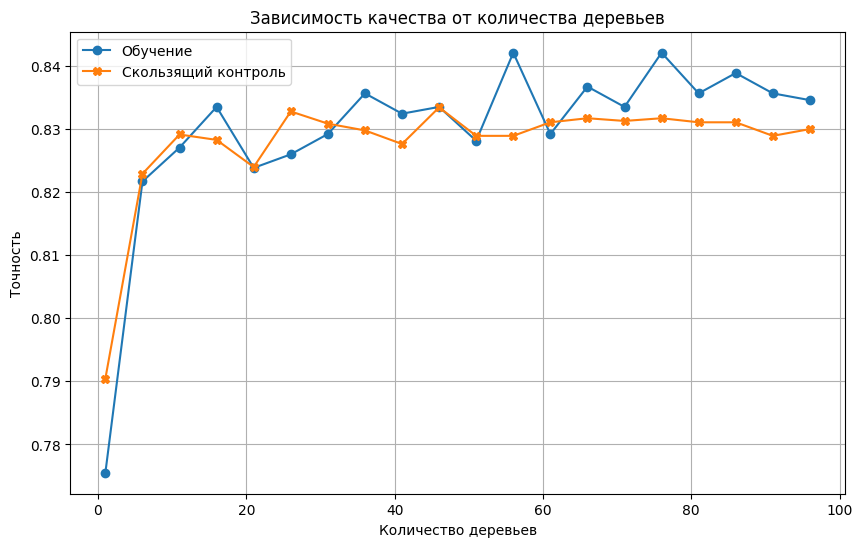

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_trees = np.arange(1, 101, 5)

def fit_forest_accuracy(n_tree):
  model = RandomForestClassifier(n_estimators=n_tree)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

def cross_val_forest_accuracy(n_tree):
  model = RandomForestClassifier(n_estimators=n_tree)
  scores = cross_val_score(model, X, y, scoring='accuracy')
  accuracy = np.mean(scores)
  return accuracy

accuracies_fit = []
accuracies_cross_val = []
for n_tree in n_trees:
  accuracies_fit.append(fit_forest_accuracy(n_tree))
  accuracies_cross_val.append(cross_val_forest_accuracy(n_tree))


plt.figure(figsize=(10, 6))
plt.plot(n_trees, accuracies_fit, label ='Обучение', marker='o')
plt.plot(n_trees, accuracies_cross_val, label='Скользящий контроль', marker='X')
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.title('Зависимость качества от количества деревьев')
plt.legend()
plt.grid()
plt.show()


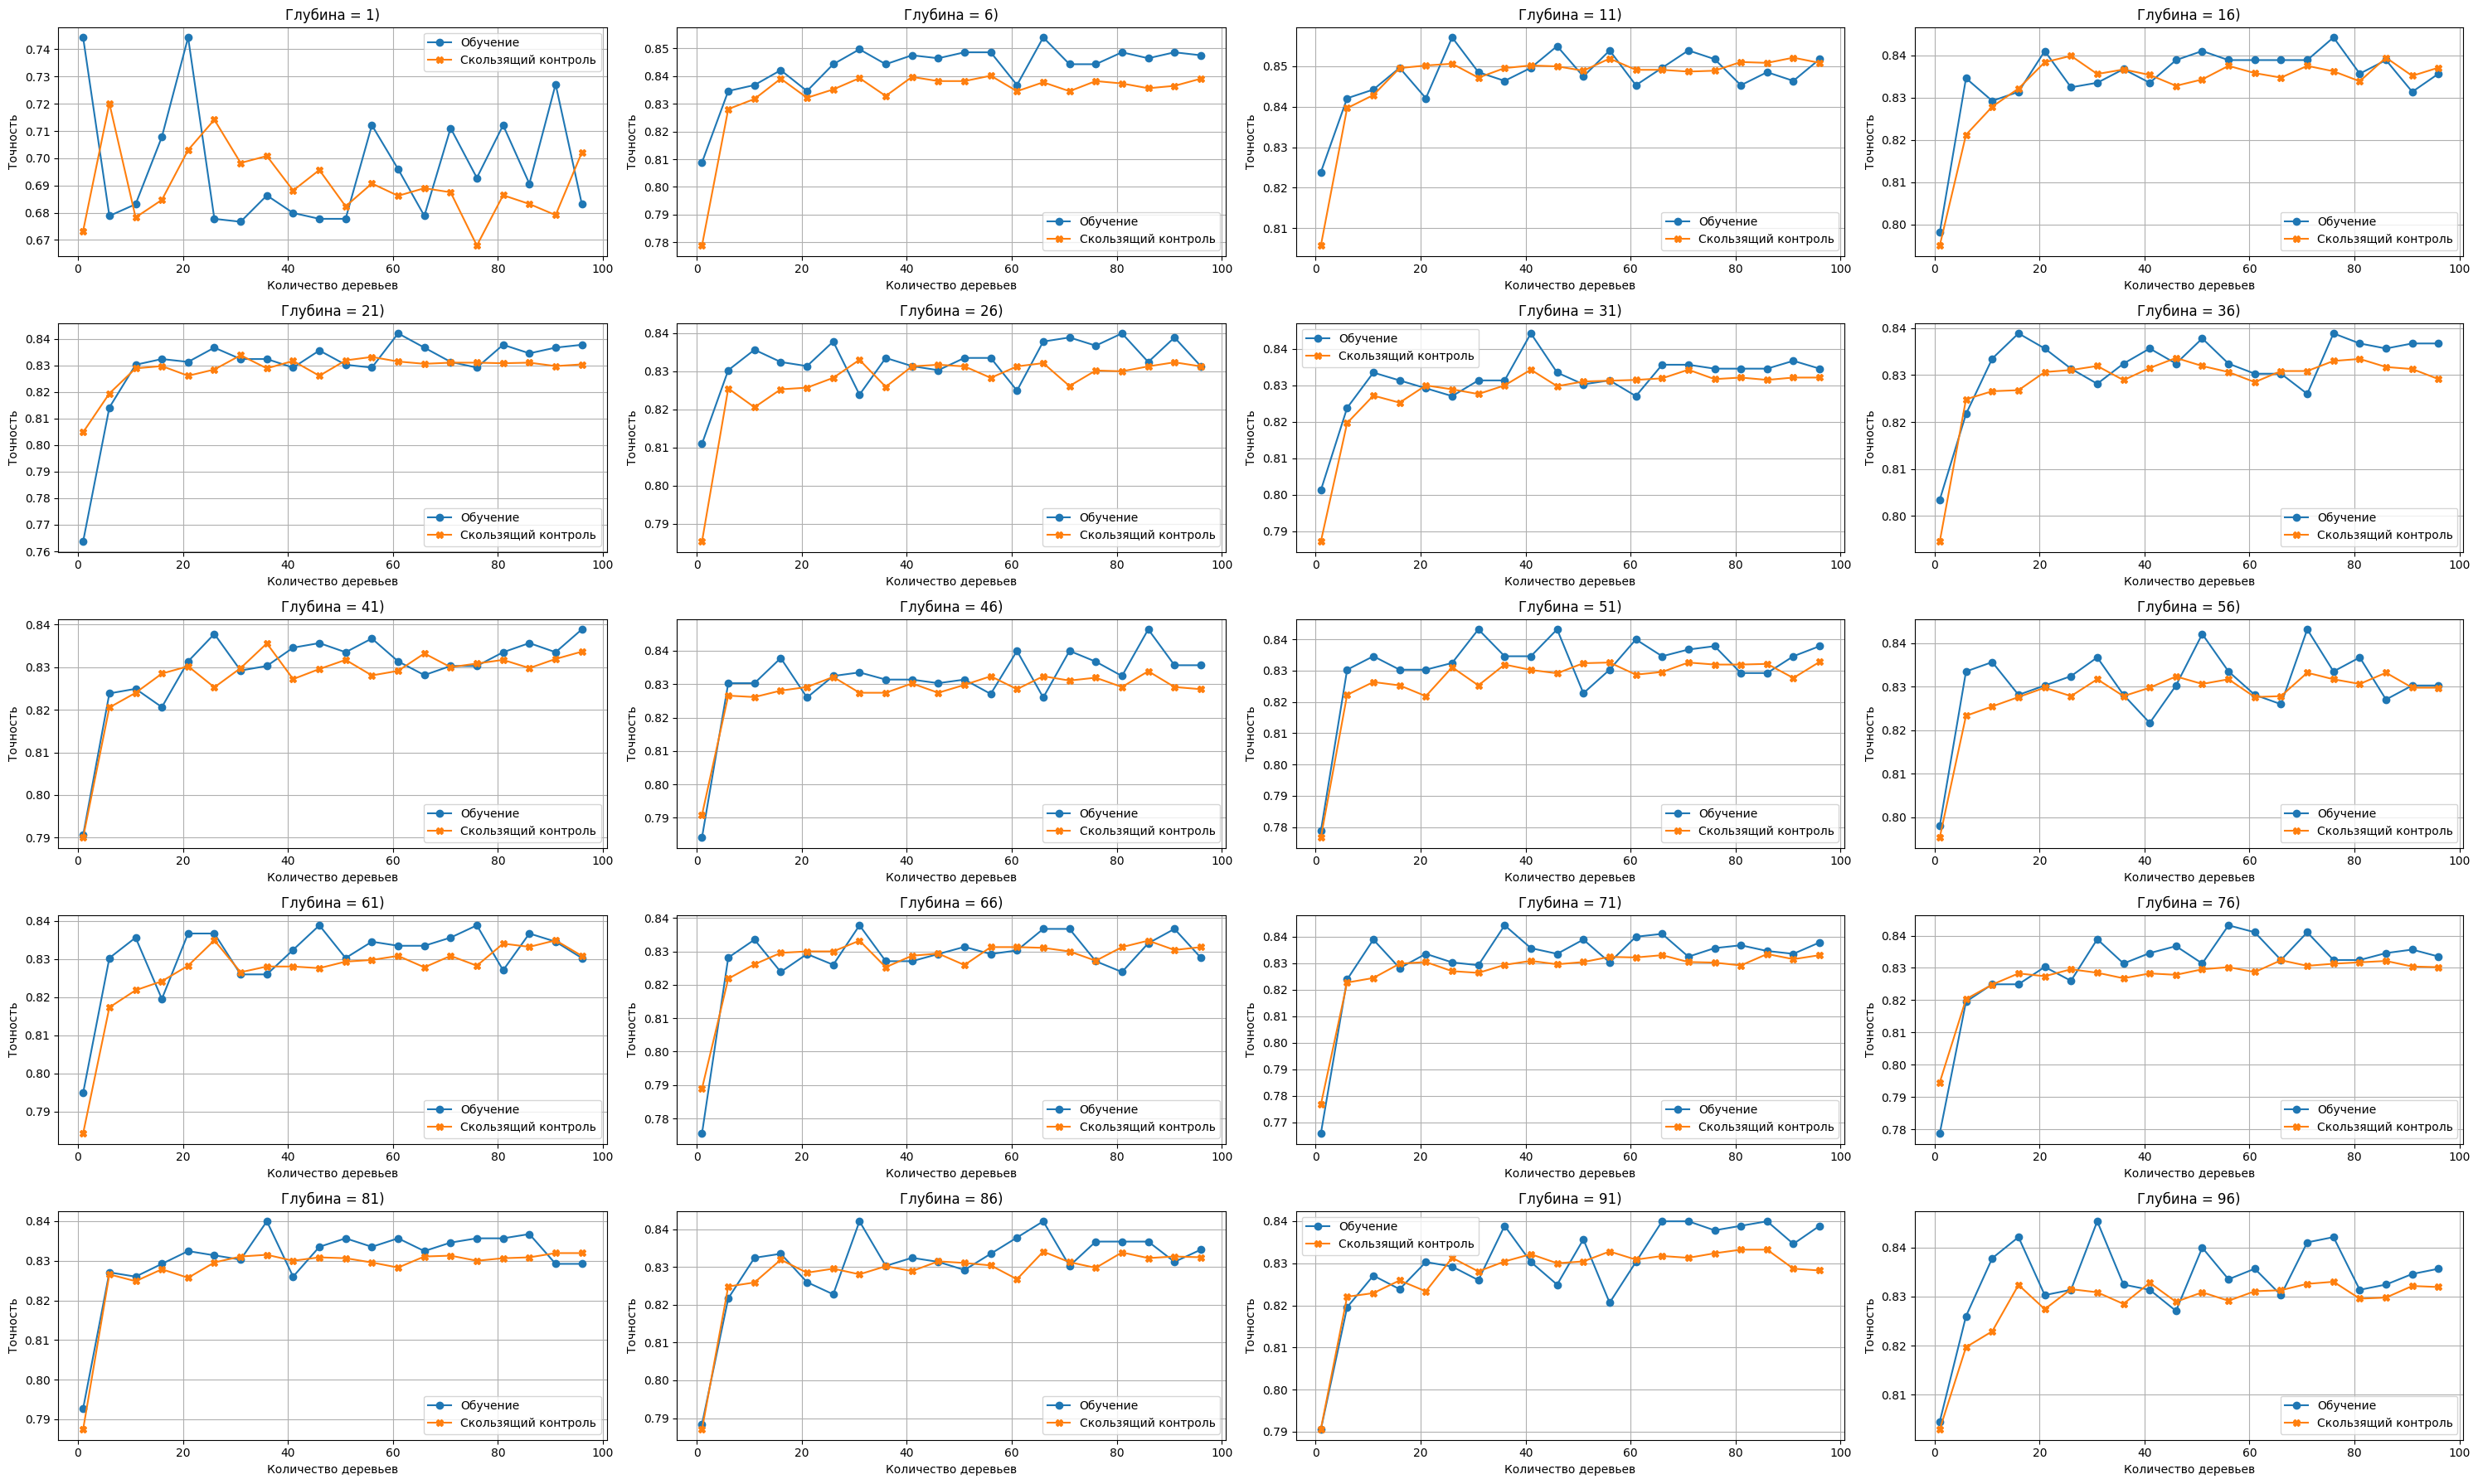

Top 5 best accuracies on fit:
1. Accuracy = 0.8571428571428571 N_trees = 26 Max_depth = 11
2. Accuracy = 0.8549946294307197 N_trees = 46 Max_depth = 11
3. Accuracy = 0.8539205155746509 N_trees = 66 Max_depth = 6
4. Accuracy = 0.8539205155746509 N_trees = 56 Max_depth = 11
5. Accuracy = 0.8539205155746509 N_trees = 71 Max_depth = 11
Top 5 best accuracies on cross_val:
1. Accuracy = 0.8521388725269394 N_trees = 91 Max_depth = 11
2. Accuracy = 0.8519235877712715 N_trees = 56 Max_depth = 11
3. Accuracy = 0.8510640656941894 N_trees = 81 Max_depth = 11
4. Accuracy = 0.8508485499462944 N_trees = 96 Max_depth = 11
5. Accuracy = 0.8508476259773857 N_trees = 86 Max_depth = 11


In [ ]:
n_trees = np.arange(1, 101, 5)
max_depths = np.arange(1, 101, 5)

def fit_forest_accuracy(n_tree, max_depth):
  model = RandomForestClassifier(n_estimators=n_tree, max_depth=max_depth)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

def cross_val_forest_accuracy(n_tree, max_depth):
  model = RandomForestClassifier(n_estimators=n_tree, max_depth=max_depth)
  scores = cross_val_score(model, X, y, scoring='accuracy')
  accuracy = np.mean(scores)
  return accuracy

fig, axs = plt.subplots(5, 4, figsize=(30, 18))
triple_fit = []
triple_cross_val = []

for max_depth, ax in zip(max_depths, axs.flatten()):
  accuracies_forest_fit = []
  accuracies_forest_cross_val = []
  for n_tree in n_trees:
    accuracy_fit = fit_forest_accuracy(n_tree, max_depth)
    accuracy_cross_val = cross_val_forest_accuracy(n_tree, max_depth)
    accuracies_forest_fit.append(accuracy_fit)
    accuracies_forest_cross_val.append(accuracy_cross_val)
    triple_fit.append((accuracy_fit, n_tree, max_depth))
    triple_cross_val.append((accuracy_cross_val, n_tree, max_depth))
  ax.plot(n_trees, accuracies_forest_fit, label ='Обучение', marker='o')
  ax.plot(n_trees, accuracies_forest_cross_val, label='Скользящий контроль', marker='X')
  ax.set_xlabel('Количество деревьев')
  ax.set_ylabel('Точность')
  ax.set_title('Глубина = ' + str(max_depth) + ')')
  ax.legend()
  ax.grid()
plt.tight_layout()
plt.show()

sorted_triple_fit = sorted(triple_fit, key = lambda x: x[0], reverse=True)
sorted_triple_cross_val = sorted(triple_cross_val, key = lambda x: x[0], reverse=True)

print('Top 5 best accuracies on fit:')
i = 1
for triple_fit in sorted_triple_fit:
  print(str(i) + '. Accuracy = ' + str(triple_fit[0]) + ' N_trees = ' + str(triple_fit[1]) + ' Max_depth = ' + str(triple_fit[2]))
  if i == 5:
    break
  i += 1

print('Top 5 best accuracies on cross_val:')
i = 1
for triple_cross_val in sorted_triple_cross_val:
  print(str(i) + '. Accuracy = ' + str(triple_cross_val[0]) + ' N_trees = ' + str(triple_cross_val[1]) + ' Max_depth = ' + str(triple_cross_val[2]))
  if i == 5:
    break
  i += 1